<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/House_Price_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#House Price Prediction Dataset
#Source: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
#Objective: Analyze house price determinants such as size, location, and amenities.

#Step 1: Setup and Data Preparation
#1. Load the Dataset

import pandas as pd

# Load the dataset
data = pd.read_csv("Housing.csv")

# Display first 5 rows
print(data.head())

# Display last 5 rows
print(data.tail())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
540  1820000  3000 

In [2]:
#2. Understand the Structure

# Check structure
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

In [3]:
#3. Handle Missing Values
#If there are missing values:

# Fill missing values with mean (for numerical) or mode (for categorical)
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical columns
        data[column] = data[column].fillna(data[column].mode()[0])
    else:  # Numerical columns
        data[column] = data[column].fillna(data[column].mean())

In [9]:
#4. Encode Categorical Variables
#Convert categorical variables into numeric form using one-hot encoding or label encoding.

#One-Hot Encoding :

# Perform one-hot encoding for binary categorical variables
# Rename columns for consistency
data = data.rename(columns={
    'mainroad': 'Main Road',
    'guestroom': 'Guest Room',
    'basement': 'Basement',
    'hotwaterheating': 'Hot Water Heating',
    'airconditioning': 'Air Conditioning',
    'furnishingstatus': 'Furnishing Status'
})

# Perform one-hot encoding for binary categorical variables
binary_columns = ['Main Road', 'Guest Room', 'Basement', 'Hot Water Heating', 'Air Conditioning']
data = pd.get_dummies(data, columns=binary_columns, drop_first=True)

# Label encode the 'Furnishing Status' column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Furnishing Status'] = label_encoder.fit_transform(data['Furnishing Status'])

# Display updated dataset
print(data.head())

      price  area  bedrooms  bathrooms  stories  parking prefarea  \
0  13300000  7420         4          2        3        2      yes   
1  12250000  8960         4          4        4        3       no   
2  12250000  9960         3          2        2        2      yes   
3  12215000  7500         4          2        2        3      yes   
4  11410000  7420         4          1        2        2       no   

   Furnishing Status  Main Road_yes  Guest Room_yes  Basement_yes  \
0                  0           True           False         False   
1                  0           True           False         False   
2                  1           True           False          True   
3                  0           True           False          True   
4                  0           True            True          True   

   Hot Water Heating_yes  Air Conditioning_yes  
0                  False                  True  
1                  False                  True  
2                  Fals

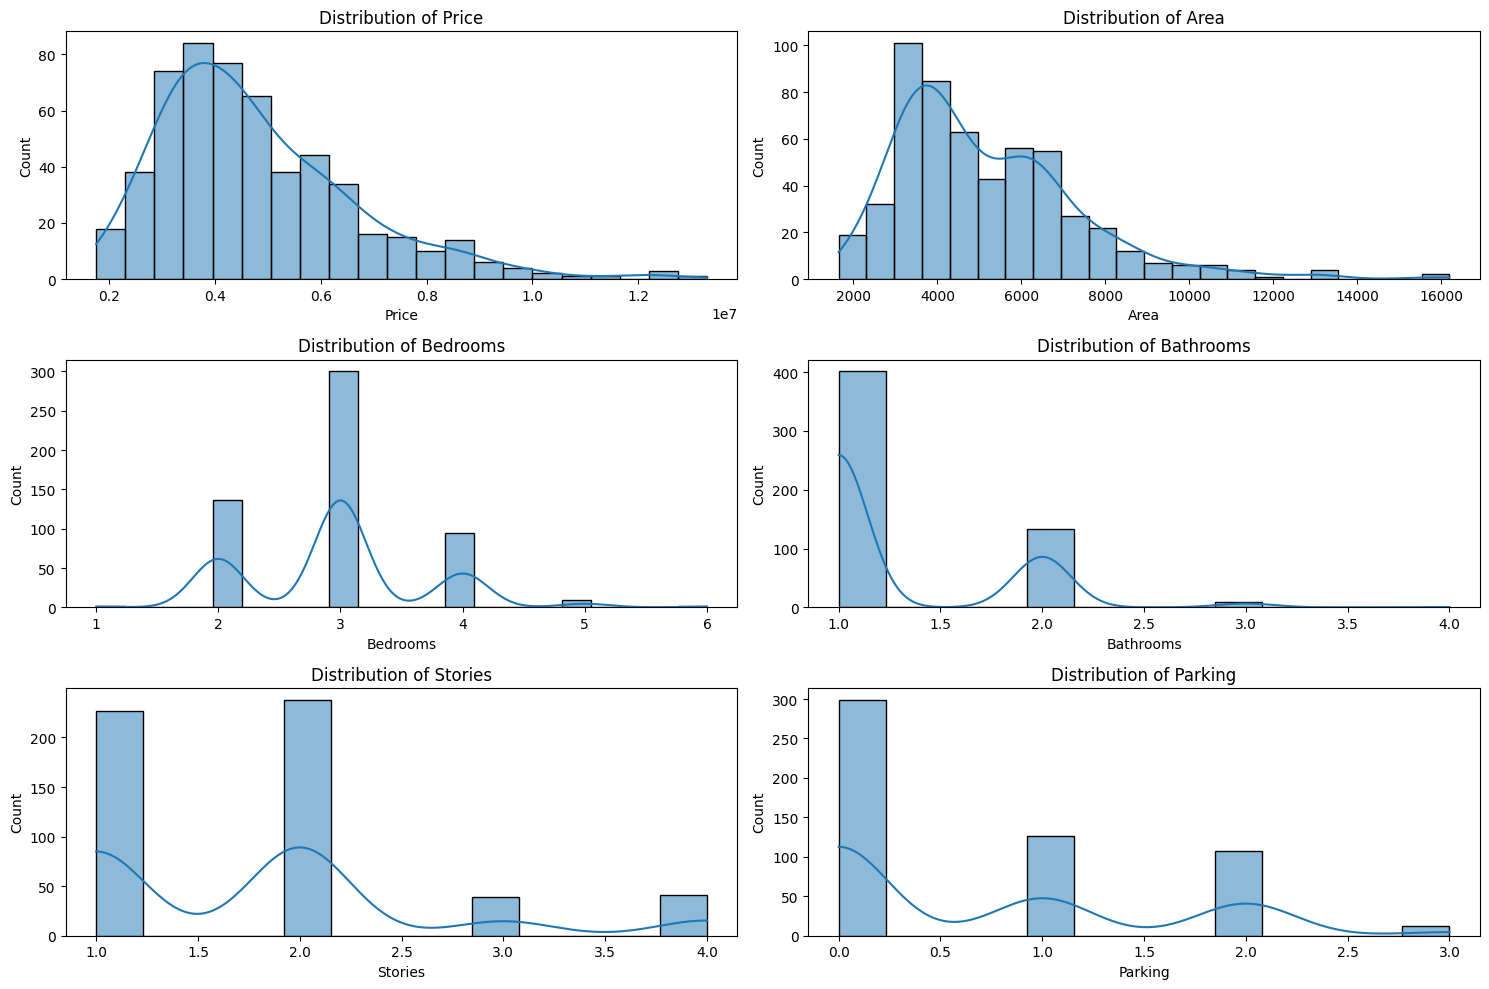

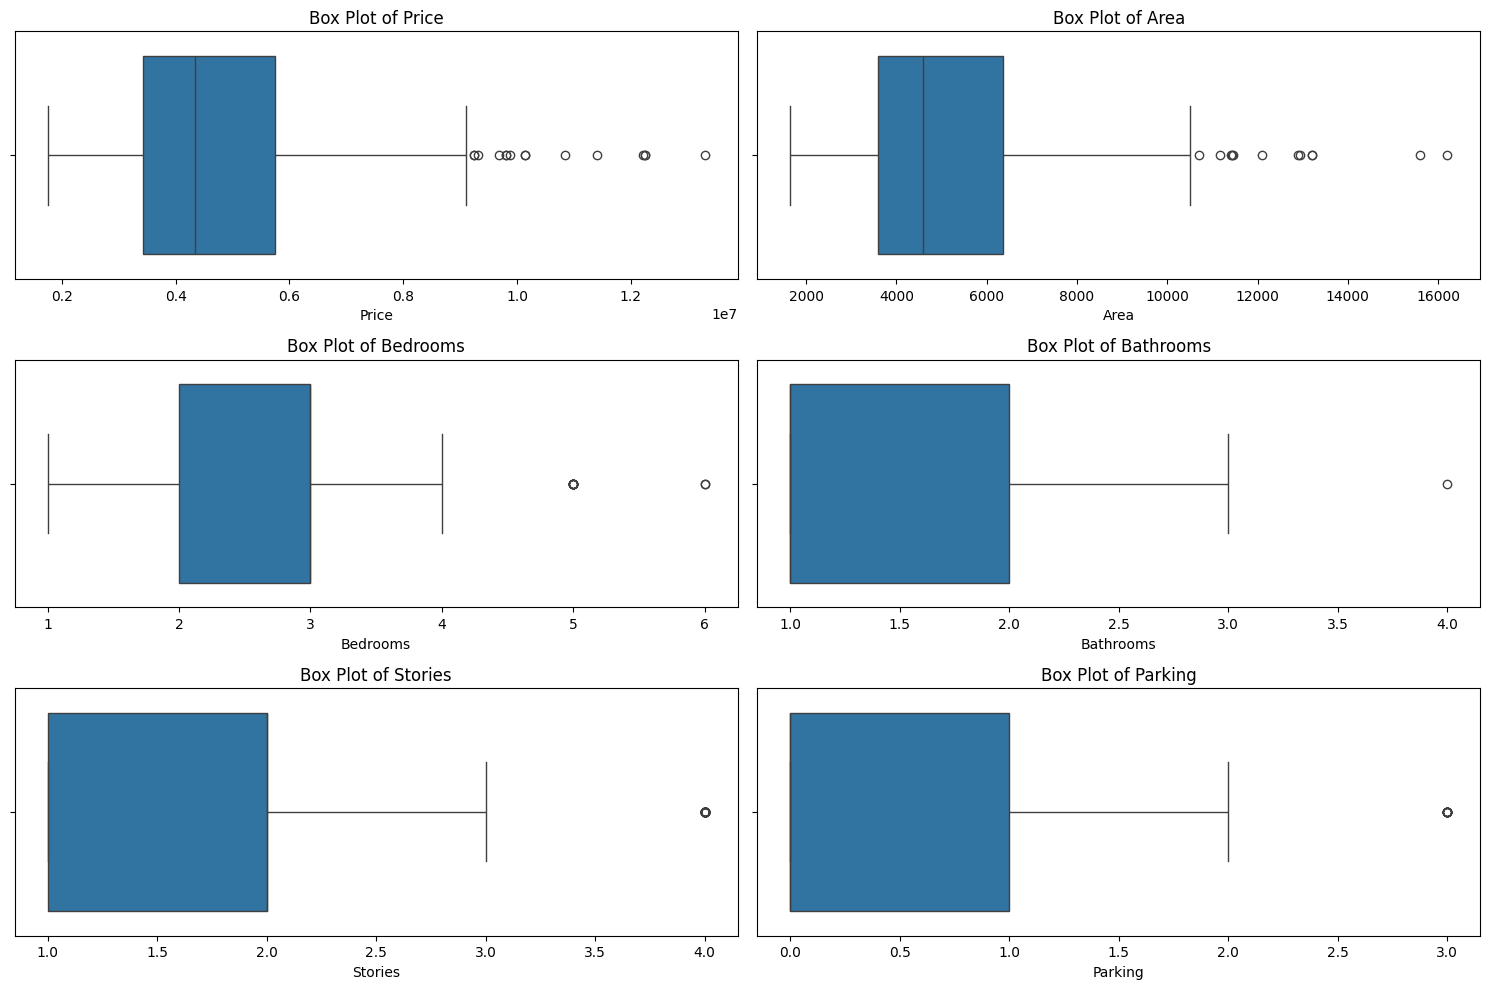

In [19]:
#Step 2: Exploratory Data Analysis (EDA)
#1. Univariate Analysis
#Analyze the distribution of individual variables.

#Numerical Columns :
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Price', 'Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking']):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Price', 'Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking']):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

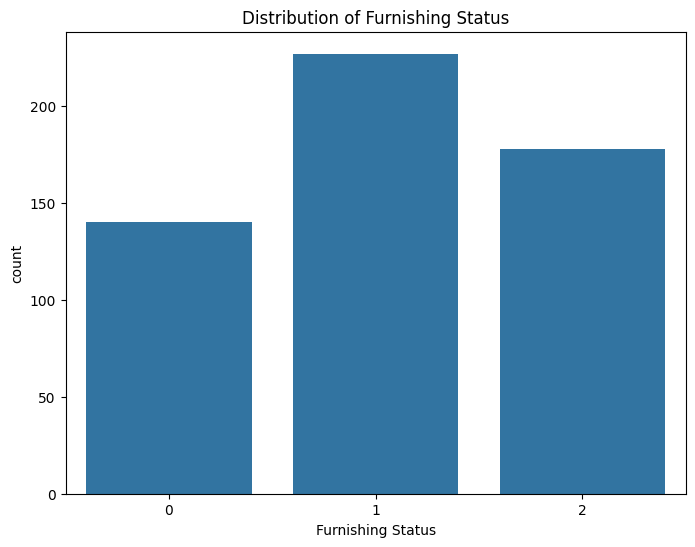

In [20]:
#Categorical Columns :
# Bar plot for Furnishing Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Furnishing Status', data=data)
plt.title('Distribution of Furnishing Status')
plt.show()

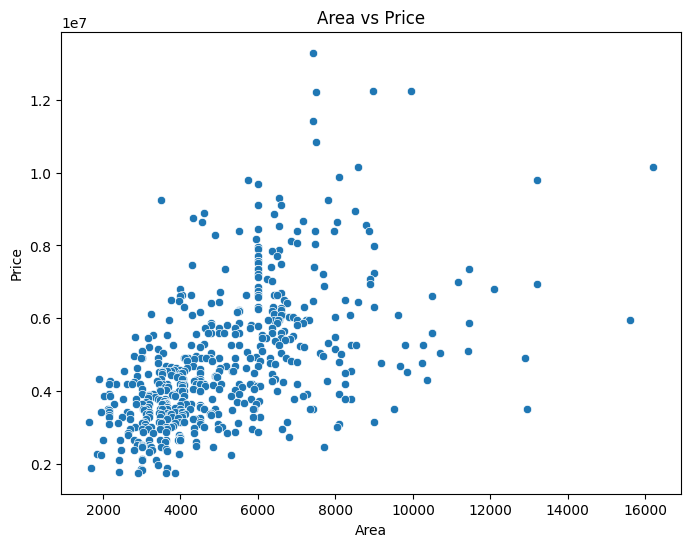

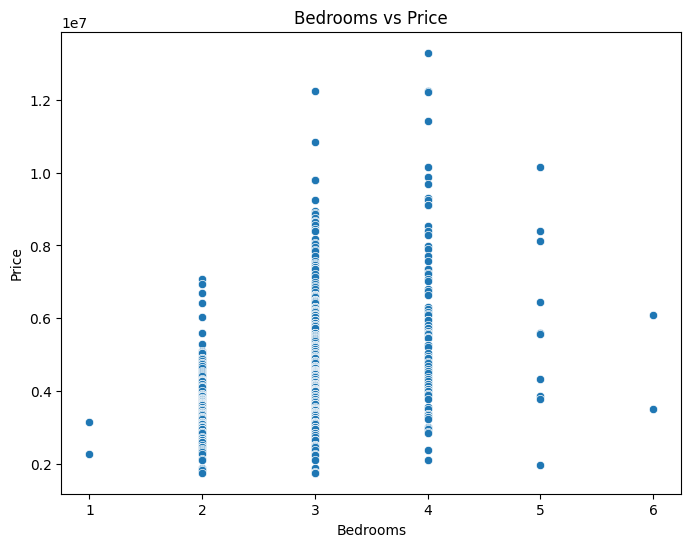

In [21]:
#2. Bivariate Analysis
#Analyze relationships between two variables.

#Scatter Plots :

# Scatter plot: Area vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area', y='Price', data=data)
plt.title('Area vs Price')
plt.show()

# Scatter plot: Bedrooms vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Bedrooms', y='Price', data=data)
plt.title('Bedrooms vs Price')
plt.show()

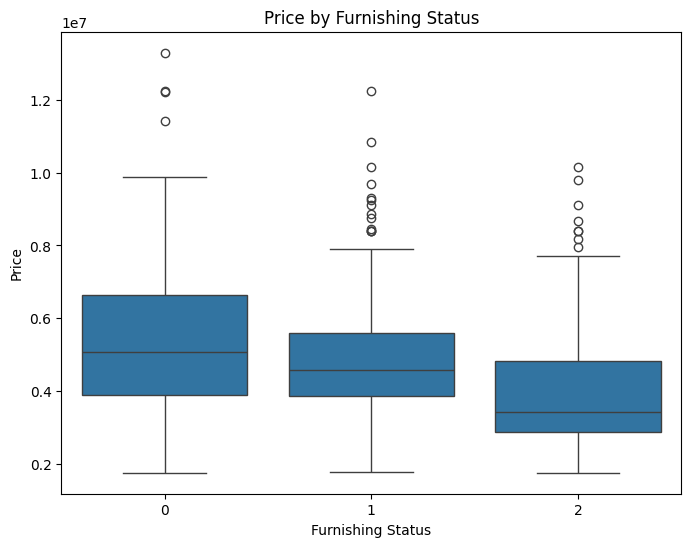

In [22]:
#Box Plots :
# Box plot: Furnishing Status vs Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='Furnishing Status', y='Price', data=data)
plt.title('Price by Furnishing Status')
plt.show()

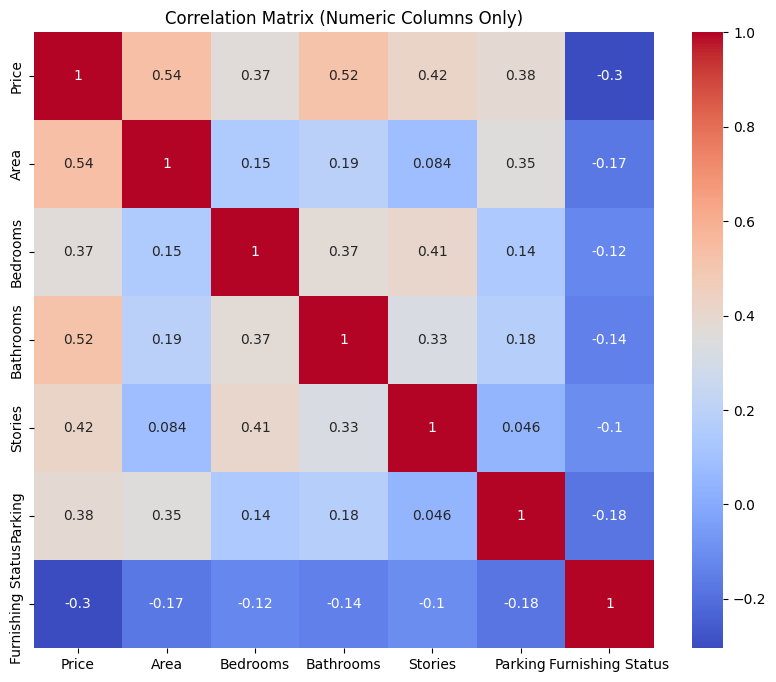

In [24]:
#3. Multivariate Analysis
#Analyze relationships between multiple variables.

#Correlation Matrix :

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()

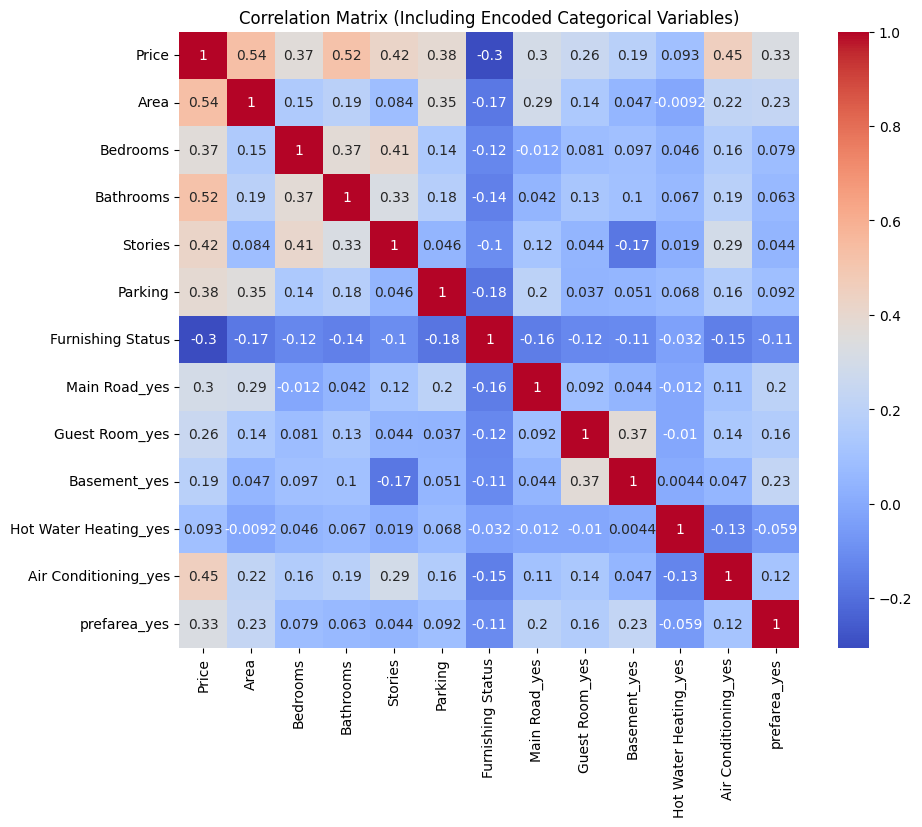

In [25]:
#Using One-Hot Encoding :
# Perform one-hot encoding for categorical columns
encoded_data = pd.get_dummies(data, drop_first=True)

# Calculate correlation matrix
correlation_matrix = encoded_data.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Including Encoded Categorical Variables)')
plt.show()

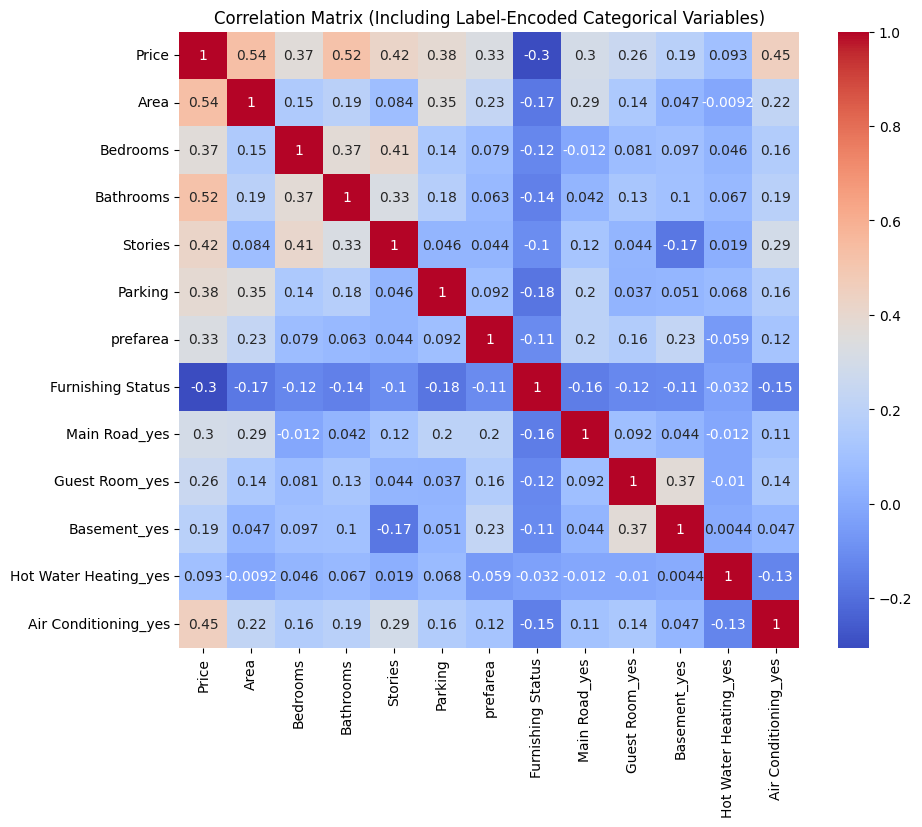

In [26]:
#Using Label Encoding :
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset
encoded_data = data.copy()

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for column in encoded_data.select_dtypes(include=['object']).columns:
    encoded_data[column] = label_encoder.fit_transform(encoded_data[column])

# Calculate correlation matrix
correlation_matrix = encoded_data.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Including Label-Encoded Categorical Variables)')
plt.show()

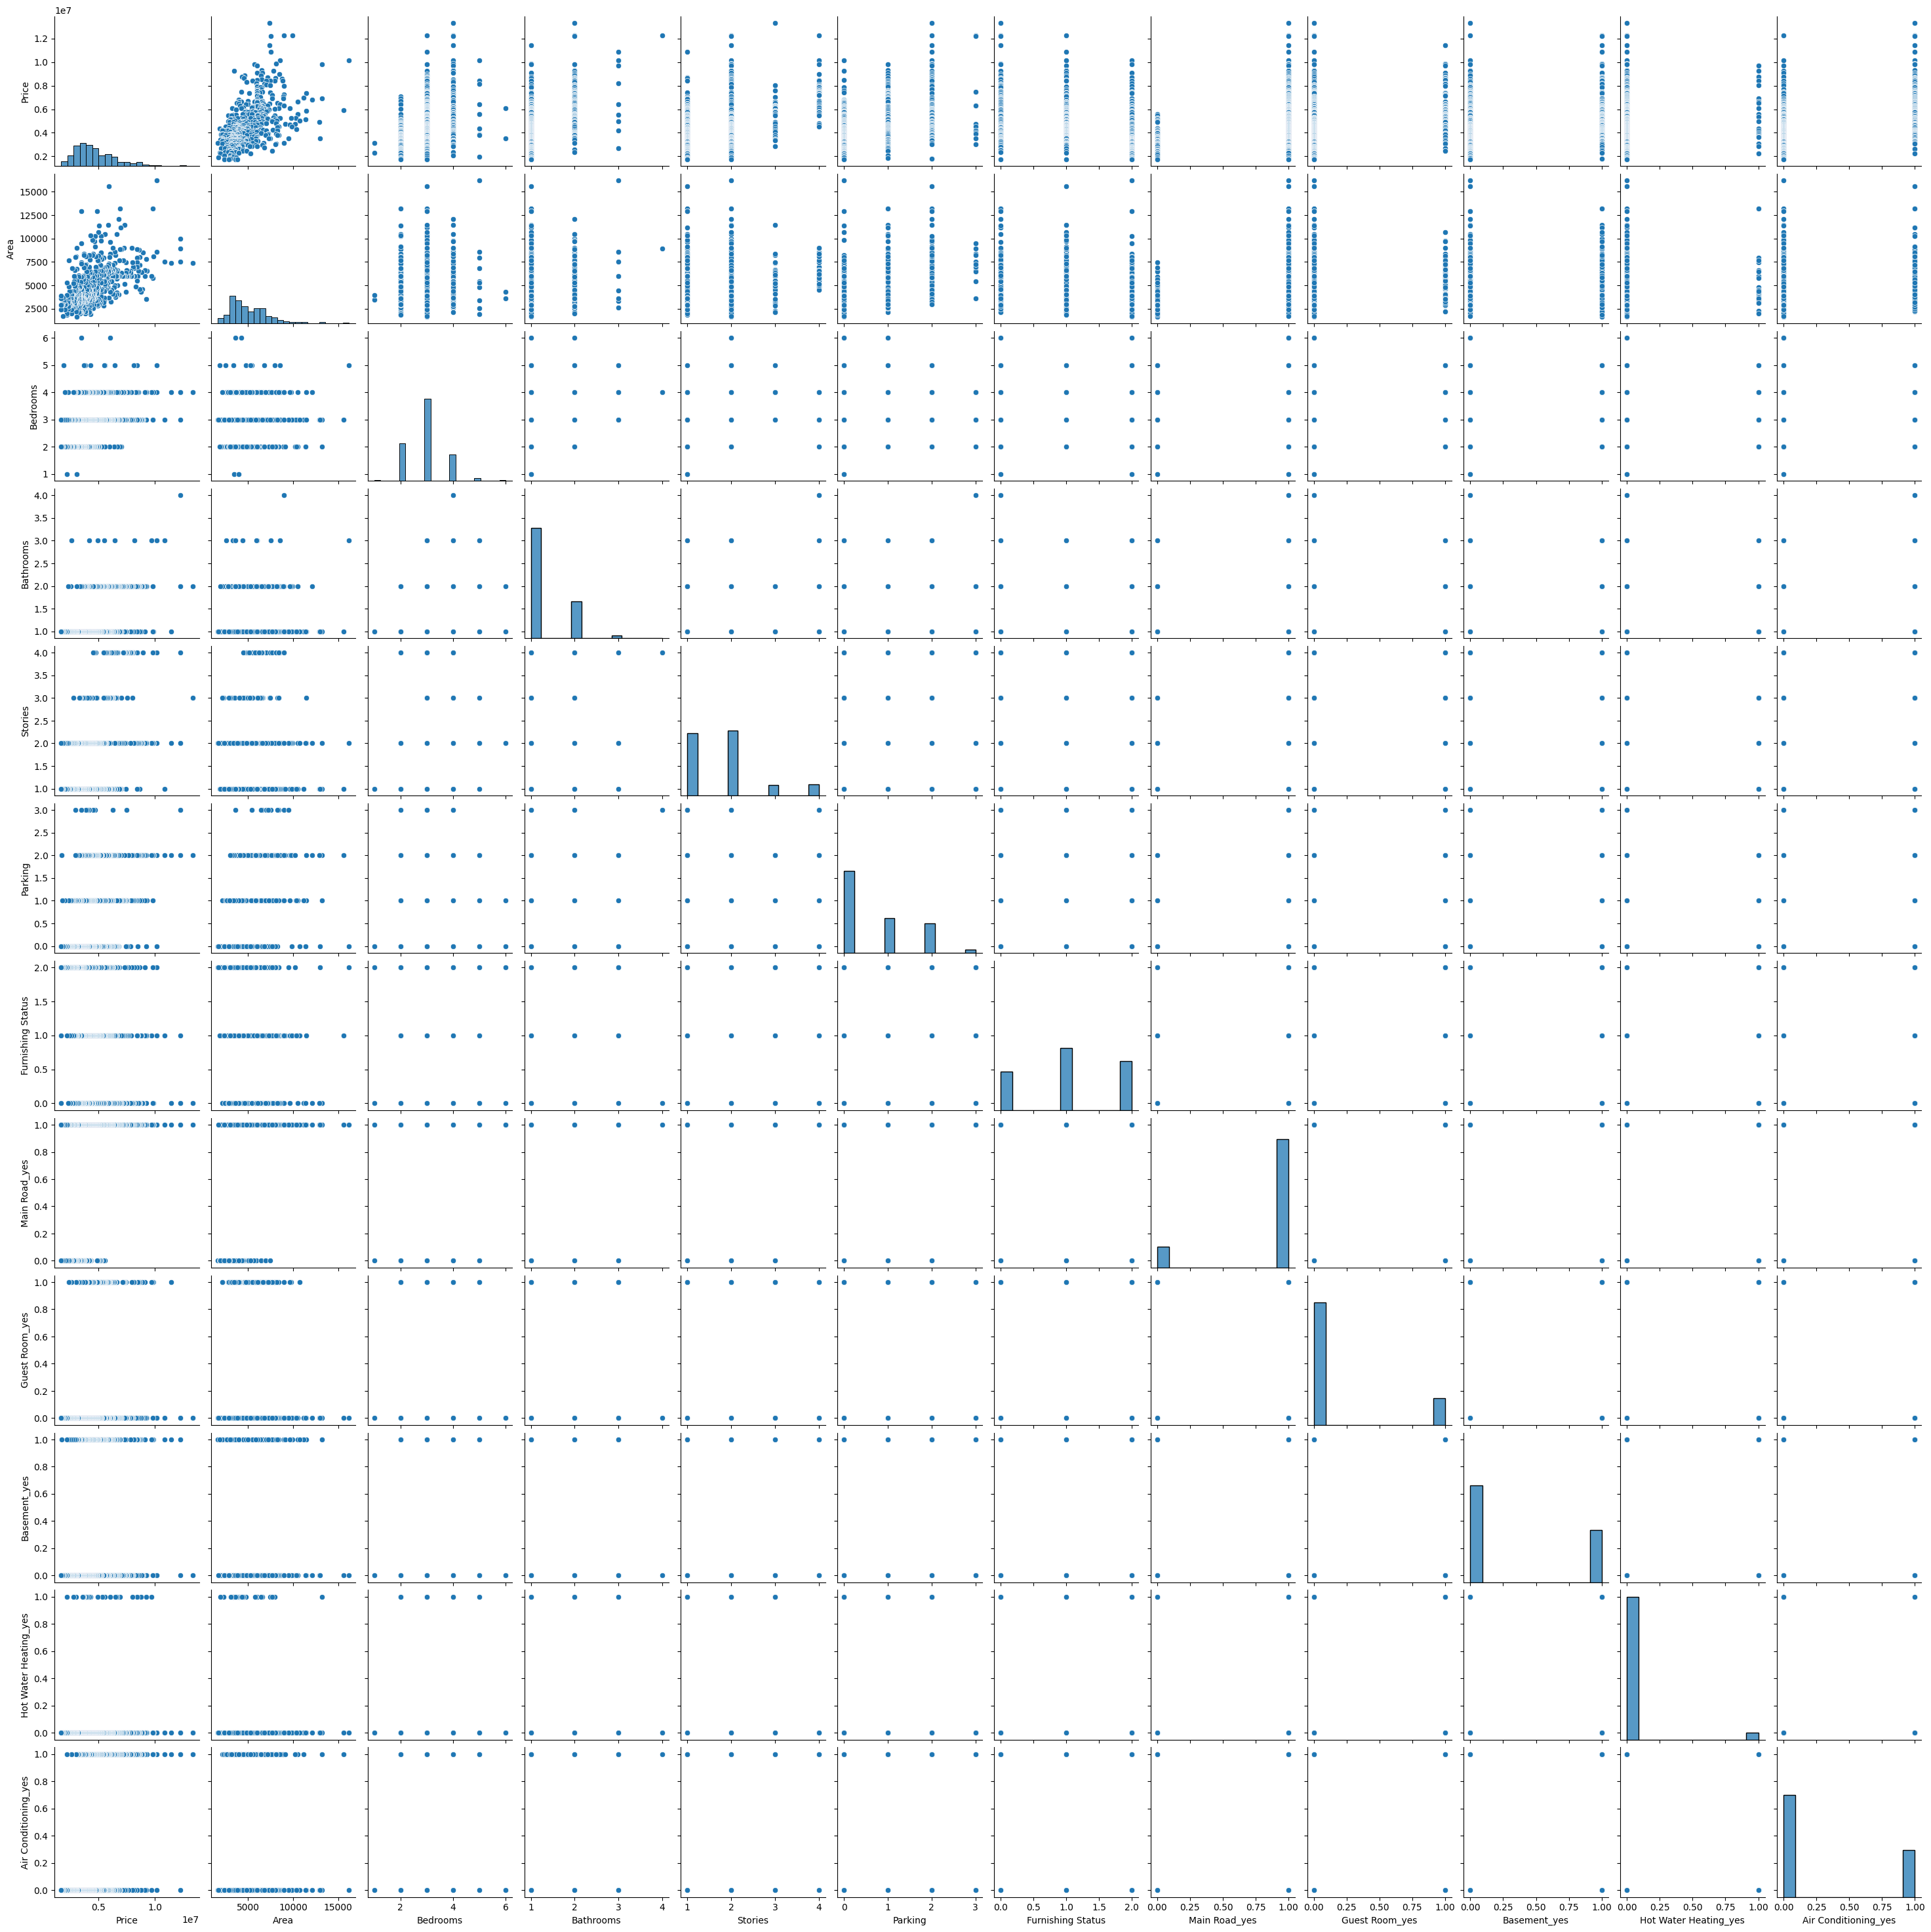

In [27]:
#Pair Plot :
# Pair plot for all variables
sns.pairplot(data)
plt.show()

In [29]:
#Step 3: Preprocessing and Feature Engineering
#1. Handle Outliers
#Detect and handle outliers using the Interquartile Range (IQR) method.

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Detect outliers using IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data_cleaned = data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Compare shapes before and after removing outliers
print("Original shape:", data.shape)
print("Cleaned shape:", data_cleaned.shape)

Original shape: (545, 13)
Cleaned shape: (463, 13)


In [35]:
#Using One-Hot Encoding :
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("Housing.csv")

# Perform one-hot encoding for categorical columns
encoded_data = pd.get_dummies(data, drop_first=True)

# Convert all columns to numeric, coercing errors to NaN
encoded_data = encoded_data.apply(pd.to_numeric, errors='coerce')

# Check for missing values caused by coercion
print("Missing values after coercion:")
print(encoded_data.isnull().sum())

# Handle missing values caused by coercion
for column in encoded_data.columns:
    if encoded_data[column].isnull().any():  # Check if column has NaN values
        encoded_data[column] = encoded_data[column].fillna(encoded_data[column].mean())

# Convert boolean columns to integers (if any)
encoded_data = encoded_data.astype(float)

# Detect outliers using IQR
Q1 = encoded_data.quantile(0.25)
Q3 = encoded_data.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data_cleaned = data[~((encoded_data < (Q1 - 1.5 * IQR)) | (encoded_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Compare shapes before and after removing outliers
print("Original shape:", data.shape)
print("Cleaned shape:", data_cleaned.shape)

Missing values after coercion:
price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64
Original shape: (545, 13)
Cleaned shape: (237, 13)


In [37]:
#2. Scale Numerical Features
#Normalize numerical features for consistency.

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("Housing.csv")

# Perform one-hot encoding for categorical columns
data_cleaned = pd.get_dummies(data, drop_first=True)

# Convert all columns to numeric, coercing errors to NaN
data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')

# Check for missing values caused by coercion
print("Missing values after coercion:")
print(data_cleaned.isnull().sum())

# Handle missing values caused by coercion
for column in data_cleaned.columns:
    if data_cleaned[column].isnull().any():  # Check if column has NaN values
        data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].mean())

# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

# Convert scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=data_cleaned.columns)

# Display the first few rows of scaled data
print(scaled_data.head())

Missing values after coercion:
price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64
      price      area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
0  4.566365  1.046726  1.403419   1.421812  1.378217  1.517692      0.405623   
1  4.004484  1.757010  1.403419   5.405809  2.532024  2.679409      0.405623   
2  4.004484  2.218232  0.047278   1.421812  0.224410  1.517692      0.405623   
3  3.985755  1.083624  1.403419   1.421812  0.224410  2.679409      0.405623   
4  3.554979  1.046726  1.403419  -0.57

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


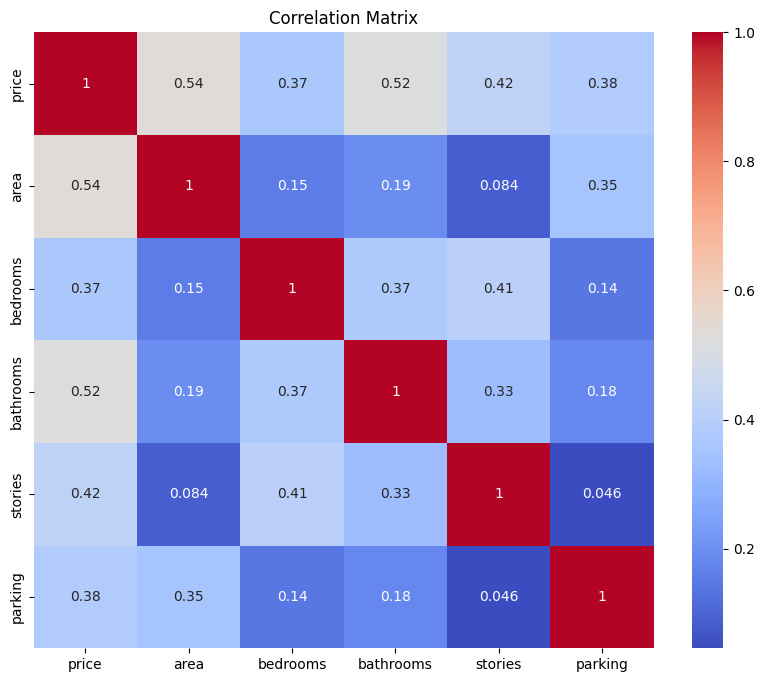

In [39]:
#Step 4: Feature Selection
#1. Correlation Analysis
#Identify features that are strongly correlated with Price.

# Define the target column
target_column = 'price'

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Display correlation with the target column
print(correlation_matrix[target_column].sort_values(ascending=False))

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

area                               0.466788
bathrooms                          0.154835
parking                            0.061691
stories                            0.055426
airconditioning_yes                0.054924
bedrooms                           0.042237
furnishingstatus_unfurnished       0.039007
prefarea_yes                       0.034931
basement_yes                       0.030676
guestroom_yes                      0.018325
hotwaterheating_yes                0.016329
furnishingstatus_semi-furnished    0.015126
mainroad_yes                       0.009704
dtype: float64


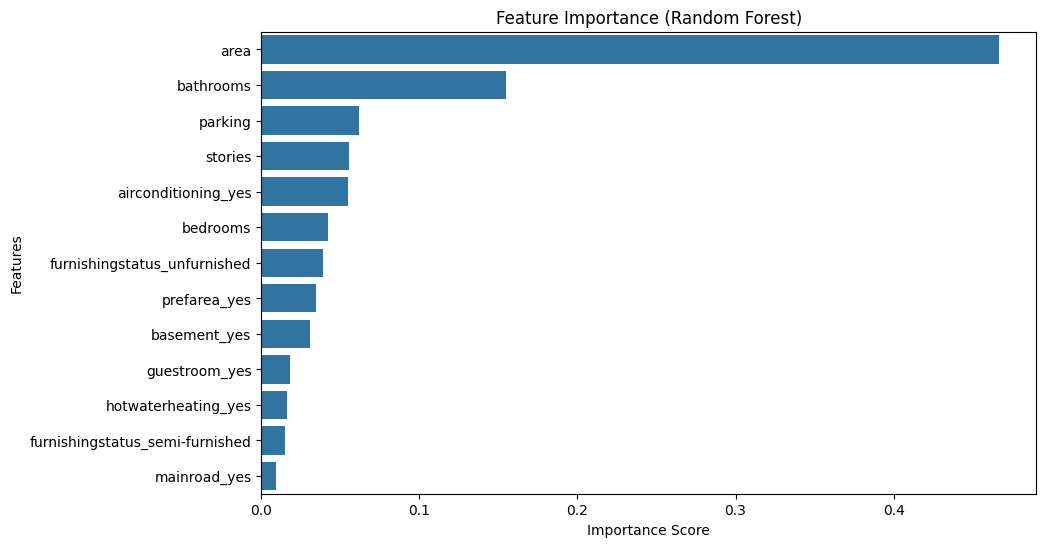

In [42]:
#2. Model-Based Feature Importance
#Use a Random Forest model to rank feature importance.

from sklearn.ensemble import RandomForestRegressor

# Split data into features (X) and target (y)
X = data_cleaned.drop('price', axis=1)
y = data_cleaned['price']

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Extract feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Display feature importance
print(feature_importances)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [43]:
"""
Step 5: Summary of Insights
Key Findings
Strong Correlations :
Area has the strongest positive correlation with Price.
Bedrooms and Bathrooms also show moderate positive correlations with Price.
Categorical Variables :
Houses with air conditioning and those near main roads tend to have higher prices.
Furnishing status significantly impacts house prices.
Outliers :
Some houses have unusually high prices or large areas, which may need further investigation.
Recommendations
Focus on Area, Bedrooms, and Bathrooms as key predictors for house prices.
Normalize features before training predictive models.
Investigate outliers to understand their impact.
"""

'\nStep 5: Summary of Insights\nKey Findings\nStrong Correlations :\nArea has the strongest positive correlation with Price.\nBedrooms and Bathrooms also show moderate positive correlations with Price.\nCategorical Variables :\nHouses with air conditioning and those near main roads tend to have higher prices.\nFurnishing status significantly impacts house prices.\nOutliers :\nSome houses have unusually high prices or large areas, which may need further investigation.\nRecommendations\nFocus on Area, Bedrooms, and Bathrooms as key predictors for house prices.\nNormalize features before training predictive models.\nInvestigate outliers to understand their impact.\n'